In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../Task5_Logistic-Regression/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [6]:
X.shape

(400, 2)

In [7]:
y.shape

(400,)

### Divide the dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(320, 2)

In [10]:
X_test.shape

(80, 2)

### I would apply standard scaling to the data bcz there is huge difference between the values of the Aga and Estimated Salary

In [11]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

### Now the values are very close to each other mean they are in the fixed upper and lower ranges of 3 IGuess

In [12]:
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [13]:
X_test

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871],
       [-0.28178945, -0.15362871],
       [ 1.4843773 , -1.05540195],
       [-1.45923396, -0.64814952],
       [-1.75359508, -1.37538601],
       [-0.77239133,  0.4863394 ],
       [-0.28178945,  1.09721805],
       [ 1.38625693, -0.93904411],
       [ 0.79753468,  0.10817643],
       [ 0.11069205, -0.82268628],
       [ 1.77873843, -0.29907601],
       [-1.55735433, -1.25902817],
       [-0.87051171,  0.28271318],
       [ 0.89565505, -1.37538601],
       [ 2.07309956,  0.16635535],
       [-1.85171546, -1.49174384],
       [ 1.28813655, -1.37538601],
       [ 0.40505317,  0.28271318],
       [-0.0855487 , -0.50270222],
       [ 1.68061805,

## First method to find K in KNN

### K is square root of X_train

In [14]:
k = np.sqrt(X_train.shape[0]).astype(int)
print(f"Optimal value of K is {k}")

Optimal value of K is 17


In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)

### Model Training

In [16]:
model.fit(X_train, y_train)

,n_neighbors,np.int64(17)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
y_pred = model.predict(X_test)
y_pred.shape

(80,)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model is {accuracy*100:.2f}%")

Accuracy of KNN model is 92.50%


In [19]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[48,  4],
       [ 2, 26]])

## Second Method to find K in KNN

### Hit and Trial method and choose the best K value

In [20]:
accuracy = []
for i in range(1, 26):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
print(accuracy)    


[0.825, 0.8625, 0.9125, 0.925, 0.9125, 0.9, 0.9375, 0.925, 0.9375, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9375, 0.925, 0.9375, 0.9375, 0.9375, 0.9375]


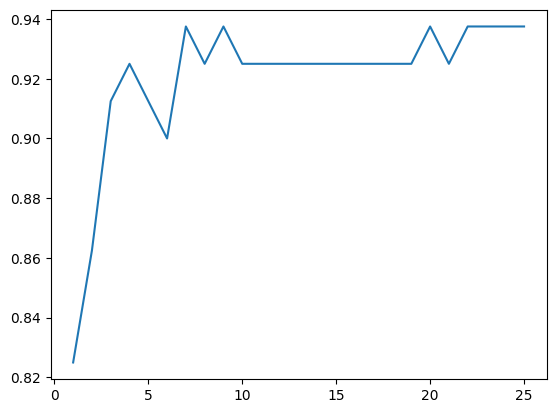

In [21]:
plt.plot(range(1, 26), accuracy)

### I guess it is achieving max value of accuracy at 7

In [22]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print(f"Accuracy of KNN model with K=7 is {accuracy*100:.2f}%")

Accuracy of KNN model with K=7 is 93.75%


### What the hell it is not passing the 93.75% accuracy, this is maximum accuracy

### Make method to predict the output of a KNN model

In [26]:
def predict_output():
    # Read the data
    age = int(input("Enter Age: "))
    salary = int(input("Enter Estimated Salary: "))
    X_new = np.array([[age, salary]])
    X_new = scaller.transform(X_new)
    # IF the model predicts 1 then the person is likely to buy the product
    if model.predict(X_new)[0] == 1:
        print("The person is likely to buy the product.")
    else:
        print("The person is not likely to buy the product.")    
predict_output()    

The person is not likely to buy the product.


## Meshgrids

### Purpose of Mesh-Grid
##### Meshgrid is very helpful to evaluate functions on the grid. We can apply any function to the point of a meshgrid to plot the function.

### Ploting the function using meshgrid

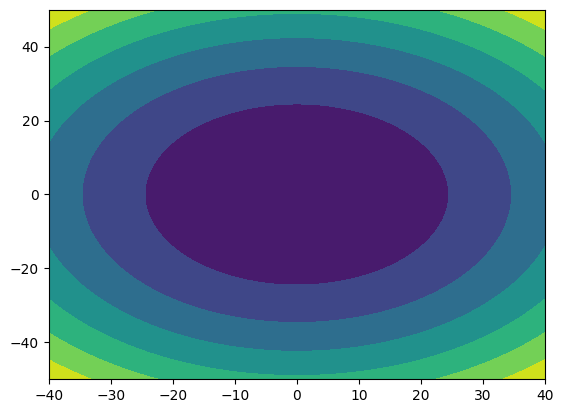

In [ ]:
X = np.linspace(-40, 40, 100)
y = np.linspace(-50, 50, 90)
XX, YY = np.meshgrid(X, y)
# This is elipse equation
Z = (XX**2 + YY**2)
plt.contourf(XX, YY, Z)

### Creating a Meshgrid

In [30]:
array1 = np.arange(start=X_train[:, 0].min()-1, stop=X_train[:, 0].max()+1, step=0.1)
array2 = np.arange(start=X_train[:, 1].min()-1, stop=X_train[:, 1].max()+1, step=0.1)
XX, YY = np.meshgrid(array1, array2)
XX

array([[-2.94983583, -2.84983583, -2.74983583, ...,  2.95016417,
         3.05016417,  3.15016417],
       [-2.94983583, -2.84983583, -2.74983583, ...,  2.95016417,
         3.05016417,  3.15016417],
       [-2.94983583, -2.84983583, -2.74983583, ...,  2.95016417,
         3.05016417,  3.15016417],
       ...,
       [-2.94983583, -2.84983583, -2.74983583, ...,  2.95016417,
         3.05016417,  3.15016417],
       [-2.94983583, -2.84983583, -2.74983583, ...,  2.95016417,
         3.05016417,  3.15016417],
       [-2.94983583, -2.84983583, -2.74983583, ...,  2.95016417,
         3.05016417,  3.15016417]], shape=(60, 62))

### Classifying every point on the Meshgrid

In [31]:
print(XX[0][0])
print(YY[0][0])

-2.949835834910827
-2.6081016808964637


In [32]:
model.predict(np.array([-2.6081016808964637, -2.949835834910827]).reshape(1, 2))

array([0])

In [36]:
input_array = np.array([XX.ravel(), YY.ravel()]).T 
labels = model.predict(input_array)
labels

array([0, 0, 0, ..., 1, 1, 1], shape=(3720,))

### Plotting the array as an image

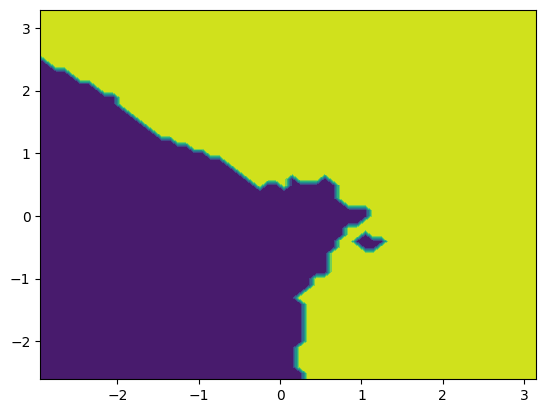

In [37]:
plt.contourf(XX, YY, labels.reshape(XX.shape))

### Plotting all the training data on the plot

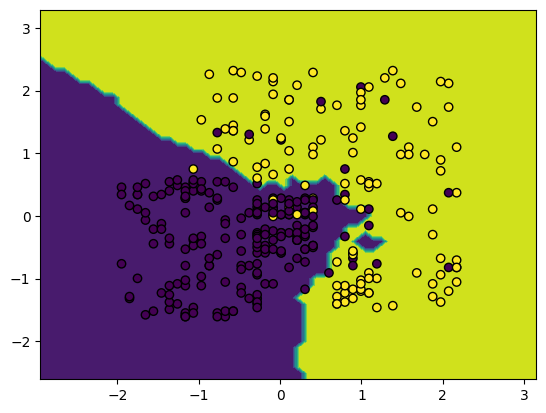

In [ ]:
plt.contourf(XX, YY, labels.reshape(XX.shape))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', marker='o')